In [115]:
import pickle as pickle
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint as pp
import math as math
from matplotlib.ticker import FuncFormatter, MaxNLocator
import pandas as pd

In [2]:
f=open('cal_sensitivity_data.p','rb')
cal_sigma=pickle.load(f, encoding='latin1') #dictionary with sensitivities for each frequency bin for each calibrator
f.close()

#cal_sig= np.array(list(cal_sigma.items()) #convert dictionary to array
                
N_freq=len(cal_sigma['3c84']) 
N_sources=len(cal_sigma.keys())
cal_sig_array =np.zeros([N_freq,N_sources]) 

for x,source in enumerate(cal_sigma.keys()):
    for y in range(N_freq):
        cal_sig_array[y,x]=cal_sigma[source][y]
        
    
cal_sig_array[np.where(cal_sig_array!=cal_sig_array)]=1000000.

sensitivity_threshold=np.geomspace(.1,100,31) #create sensitivity thresholds 

#binStruct= {}
#binStruct['sensitivity']=np.zeros(len(sensitivity_threshold))
#binStruct['bin_count']=np.zeros(len(sensitivity_threshold))
N_freq=len(cal_sigma['3c84'])
N_threshold=len(sensitivity_threshold)
binned_array = np.zeros(shape=(N_freq,N_threshold))

 #first loop is going thru each frequency bin    
for i in range(N_freq):
  
 
    #sigma_bin=[x for x in cal_sig_array if np.isnan(cal_sig_array)==False]
    #sigma_bin=np.where(np.isnan(cal_sig_array)==False)
    
    #sigma_bin=np.array(sigma_bin)
   # bin_count_per_threshold = []

    #second loop is going thru each sensitivity threshold 
    for j in range(N_threshold):
        binned_array[i,j]=np.sum(cal_sig_array[i]*1500<=sensitivity_threshold[j]) #factor of 1500 to take into account 300 kn/s and 5 sigma detection



In [27]:
cal_sig_array.shape  #(sensitivity for each sources (344?) for each freq bin (181) ? 

(181, 344)

In [48]:
len(cal_sigma['3c84'])
binned_array.shape

(181, 31)

In [49]:
#181 freq bins
#344 sources
#sensitivity threshold in Jy

[315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332
 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350
 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368
 369 370 371 372 373 374 375 376 377 378 379 380]


In [200]:
DL_array

array([[  3863.3,   2064.4,      0. ],
       [  1736.6,   5398.6,   1811.7],
       [ 13324.6,   9284.5,   4086.2],
       [ 82517.7,  65895.2,  42080.2]])

/Users/mfuchs/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


['0.10', '0.13', '0.16', '0.20', '0.25', '0.32', '0.40', '0.50', '0.63', '0.79', '1.00', '1.26', '1.58', '2.00', '2.51', '3.16', '3.98', '5.01', '6.31', '7.94', '10.00', '12.59', '15.85', '19.95', '25.12', '31.62', '39.81', '50.12', '63.10', '79.43', '100.00']


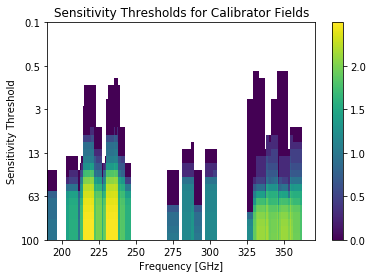

In [3]:

fig = plt.figure()
ax = fig.add_subplot(1, 1,1)
plot = ax.imshow(np.transpose(np.log10(binned_array)),extent=[190,371,100,.1],aspect='auto')

fig.colorbar(plot)
ax.set_yticklabels([.1,.5,3,13,63,100])


#plt.yscale('log')
#extent=[horizontal_min,horizontal_max,vertical_min,vertical_max].

y_label=['{:.2f}'.format(x) for x in sensitivity_threshold]
print(y_label)

#plt.xtitle('Sensitivity Thresholds')
#plt.ytitle('Frequency')
#plt.Axes.set_yticklabels('.1.003.0001')
#plt.yticks(sensitivity_threshold)
#y_label=[.1,.003,0.0001])

#plt.axes.set_yticklabels('',y_label)
#ax1.set_xticklabels
#plt.Axes.axes('Frequency [GHz]')
#plt.colorbar()
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Sensitivity Threshold')
plt.title('Sensitivity Thresholds for Calibrator Fields')

plt.savefig('SensitivityFig-fluxonly.png')
plt.show()




# Major ticks
#ax.set_xticks(np.arange(0, 10, 1));
#ax.set_yticks(np.arange(0, 10, 1));

# Labels for major ticks
#ax.set_xticklabels(np.arange(1, 11, 1));
#ax.set_yticklabels(y_label);



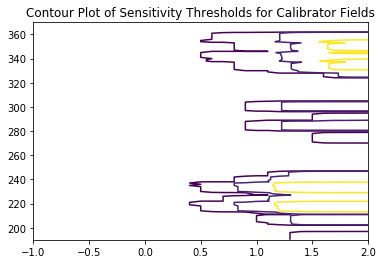

In [186]:
freq_bin=np.array(range(190,371,1))
plt.contour(np.log10(sensitivity_threshold), freq_bin,binned_array,[1,10,100])
plt.title('Contour Plot of Sensitivity Thresholds for Calibrator Fields')

plt.savefig('SensitivityContourFig-fluxonly.png')
plt.show()
#.1 is 20%, .3 is factor of 2, .5 is pi, 1 is 10

In [ ]:
# Need to convert sensitivity calculations into luminosity function constraints
# Create new bins for sensitivity values based on freq range

#New freq observed arrays
#190 to 214 GHz
freqObs_190=np.array(range(60))+190
#250 to 314 GHz
freqObs_250=np.array(range(65))+250
#315 to 350 GHz
freqObs_315=np.array(range(66))+315



In [232]:
# Step 1: Derive redshift values for different spectral lines: 

# CO(3-2) @ 345 GHz, CO(4-3) @ 461 GHz, CO(5-6) @ 576 GHz, CII @ 1896 GHZ
freqEmit = np.array([345,461,575,1896])

#CO(3-2)
z_CO32_190 = (freqEmit[0]-freqObs_190)/(freqObs_190)
z_CO32_250 = (freqEmit[0]-freqObs_250)/(freqObs_250)
z_CO32_315 = (freqEmit[0]-freqObs_315)/(freqObs_315)


#CO(4-3)
z_CO43_190 = (freqEmit[1]-freqObs_190)/(freqObs_190)
z_CO43_250 = (freqEmit[1]-freqObs_250)/(freqObs_250)
z_CO43_315 = (freqEmit[1]-freqObs_315)/(freqObs_315)

#CO(5-6)
z_CO56_190 = (freqEmit[2]-freqObs_190)/(freqObs_190)
z_CO56_250 = (freqEmit[2]-freqObs_250)/(freqObs_250)
z_CO56_315 = (freqEmit[2]-freqObs_315)/(freqObs_315)

#CII
z_CII_190 = (freqEmit[3]-freqObs_190)/(freqObs_190)
z_CII_250 = (freqEmit[3]-freqObs_250)/(freqObs_250)
z_CII_315 = (freqEmit[3]-freqObs_315)/(freqObs_315)



In [192]:
# Step 2: Create function to use Karto's code to used Ned Wright's cosmological calc online to calculate luminosity distance, D_L



lumDist_210=np.array([3863.3,1736.60,13324.6,82517.7])
lumDist_250=([2064.4,5398.6,9284.5,65895.2])
lumDist_345=([0,1811.7,4086.2,42080.2])

# Step 3: Calculate Brightness Temp Luminosity [L_solar]

#create function to do!
def temp_lum(freqObs,lumDist, sv, z):
   
    c = 3**5 #km/s
    kb = 1.38**-23 #Jy/K
    return (c**2/2*kb)*freqObs**-2*pow(lumDist,2)*pow((1+z),-3)*sv



array([  2.83598644e+06,   6.20779942e+05,   3.25342027e+07,
         2.47405718e+08])

In [ ]:
# Step 4: Calculate volume of space per pointing